In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings

from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sqlalchemy import create_engine
from sqlalchemy import create_engine
from sklearn import linear_model
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

In [25]:
knt=pd.read_csv("C:\\Users\\Gunesim\\Desktop\\Ödevler\\konut_train.csv", encoding="utf8", engine="python")

In [4]:
konut=knt
for i in kategorik:
    konut[i]=knt[i].fillna("Null")
for i in surekli:
    konut[i]=knt[i].fillna(0)

In [7]:
konut_korr=konut.corr()

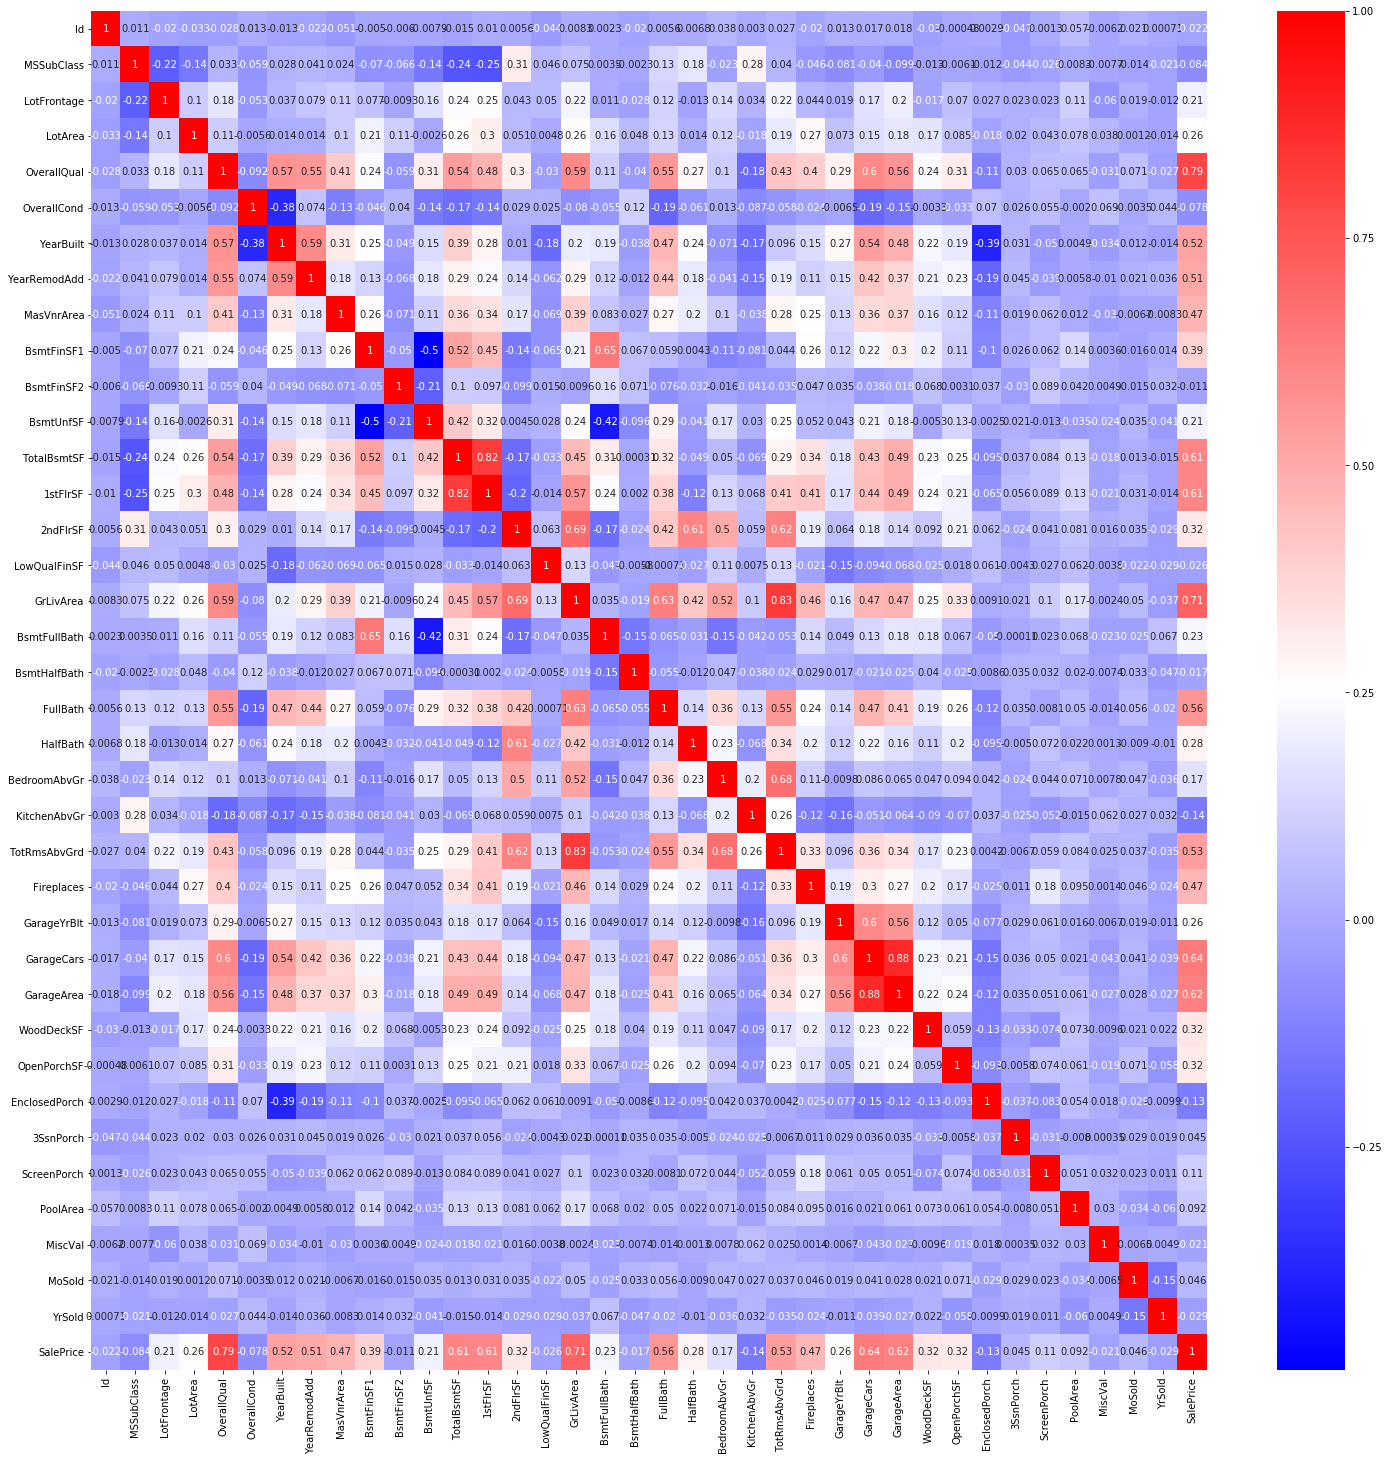

In [11]:
plt.figure(figsize=(25,25))

sns.heatmap(konut_korr, cmap="bwr", annot=True)
plt.show()

Korelasyon tablosunda, korelasyon değeri 0.6 ve daha yukarı olanları aldım. Ancak; "OverallQual", "GarageCars" ve "GarageArea" arasında da yüksek korelasyon olduğundan dolayı, sadece bu değerlerden en yüksek olan "OverallQual" parametresini regresyona dahil ettim.

#### linearmodel ile yapınca;

In [13]:
Y=konut["SalePrice"]
X=konut[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea"]]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### statsmodel ile yapınca;

In [30]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:10:12   Log-Likelihood:                -17550.
No. Observations:                1460   AIC:                         3.511e+04
Df Residuals:                    1455   BIC:                         3.514e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.09e+05   5042.479    -21.613      0.000   -1.19e+05   -9.91e+04
OverallQual  2.846e+04   1028.503     27.671      0.000    2.64e+04    3.05e+04
TotalBsmtSF    25.7604      4.453      5.784      0.000      17.025      34.496
1stFlrSF       16.6766      5.181      3.219      0.001       6.513      26.840
GrLivArea      45.9858      2.761     16.654      0.000      40.569      51.402
==============================================================================
Omnibus:                      511.104   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43306.711
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                      29.646   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regresyon Modelimiz

In [23]:
print("SalePrice= {:.3f} +\n            {:.3f} OverallQual +\n            {:.3f} TotalBsmtSF +\n            {:.3f} 1stFlrSF +\n            {:.3f} GrLivArea"
      .format(regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3]))

SalePrice= -108981.694 +
            28459.702 OverallQual +
            25.760 TotalBsmtSF +
            16.677 1stFlrSF +
            45.986 GrLivArea
